#         Advertising Analytics: Linear Regression Model











## Introduction

In this notebook, we will explore the process of building a multi-linear regression model from scratch to predict sales based on advertising expenditure across various media channels. We will start by exploring and cleaning the data, followed by data visualization and preprocessing. We will then dive into the details of constructing the model, training it using gradient descent, and finally evaluating its performance. Additionally, we'll implement an interactive visualization for gradient descent to better understand the optimization process.

## Table of Contents

1. **Exploring the Data**
   - 1.1 Initial Data Examination
   - 1.2 Summary Statistics

2. **Data Cleaning**
   - 2.1 Handling Missing Values

3. **Data Visualization**
   - 3.1 Correlation Matrix
   - 3.2 Pair Plots

4. **Data Preprocessing**
   - 4.1 Feature Scaling
   - 4.2 Encoding Categorical Variables (if applicable)

5. **Multi-Linear Regression Model from Scratch**
   - 5.1 Model Description
     - 5.1.1 Understanding the Model Equation
   - 5.2 Model Training
     - 5.2.1 Cost Function
       - Derivation and Explanation
   - 5.3 Learning Algorithm: Gradient Descent
     - 5.3.1 Overview
       - Basic Concept and Purpose
     - 5.3.2 Calculating the Gradients for Weights
       - Mathematical Derivation
     - 5.3.3 Calculating the Gradients for the Intercept
       - Step-by-Step Calculation
   - 5.4 Python Implementation
     - Coding the Model and Training Process

6. **Model Evaluation**
   - 6.1 Mean Absolute Error
     - Calculation and Interpretation
   - 6.2 Accuracy
     - Metric Definition and Computation
   - 6.3 Testing Our Model
     - Performance on Test Data
   - 6.4 Testing the Scikit-Learn Regression Model
     - Comparison with Our Implementation
   - 6.5 Actual Observation vs. Predicted Values
     - Visual and Numerical Analysis
   - 6.6 Regressions for Each Feature
     - Individual Feature Impact Analysis

7. **Interactive Gradient Descent Visualization for Linear Regression**
   - Dynamic Visual Representation of Gradient Descent

---

This structured outline provides a clear roadmap for your project, ensuring a comprehensive approach to building and understanding your multi-linear regression model for advertising data.

### Objective

##### The goal is to predict the sales based on the advertising budget for all   the media channels

### 1. Exploring the Data
First, we need to explore the dataset to understand which features are available and how they relate to the target variable, sales. This step is crucial for identifying important features and gaining insights that will guide the subsequent data preprocessing and modeling steps.

1.1 Initial Data Examination
We begin by loading the dataset and examining the first few rows to get a sense of the data structure and the types of values it contains.

In [3]:
import pandas as pd

# Load the dataset
adv_df = pd.read_csv('Advertising.csv')
# Overview of the Pandas DataFrame
adv_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# Display the first few rows of the dataset
print(adv_df)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


### 2- Feature Overview
We need to understand the available features in the dataset and their relationships with the target variable, Sales. The dataset includes the following columns:

##### TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
##### Radio: Advertising dollars spent on Radio
##### Newspaper: Advertising dollars spent on Newspaper
##### Sales: Sales of the product (in thousands of units)

In [5]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


### 3 Data Visualization

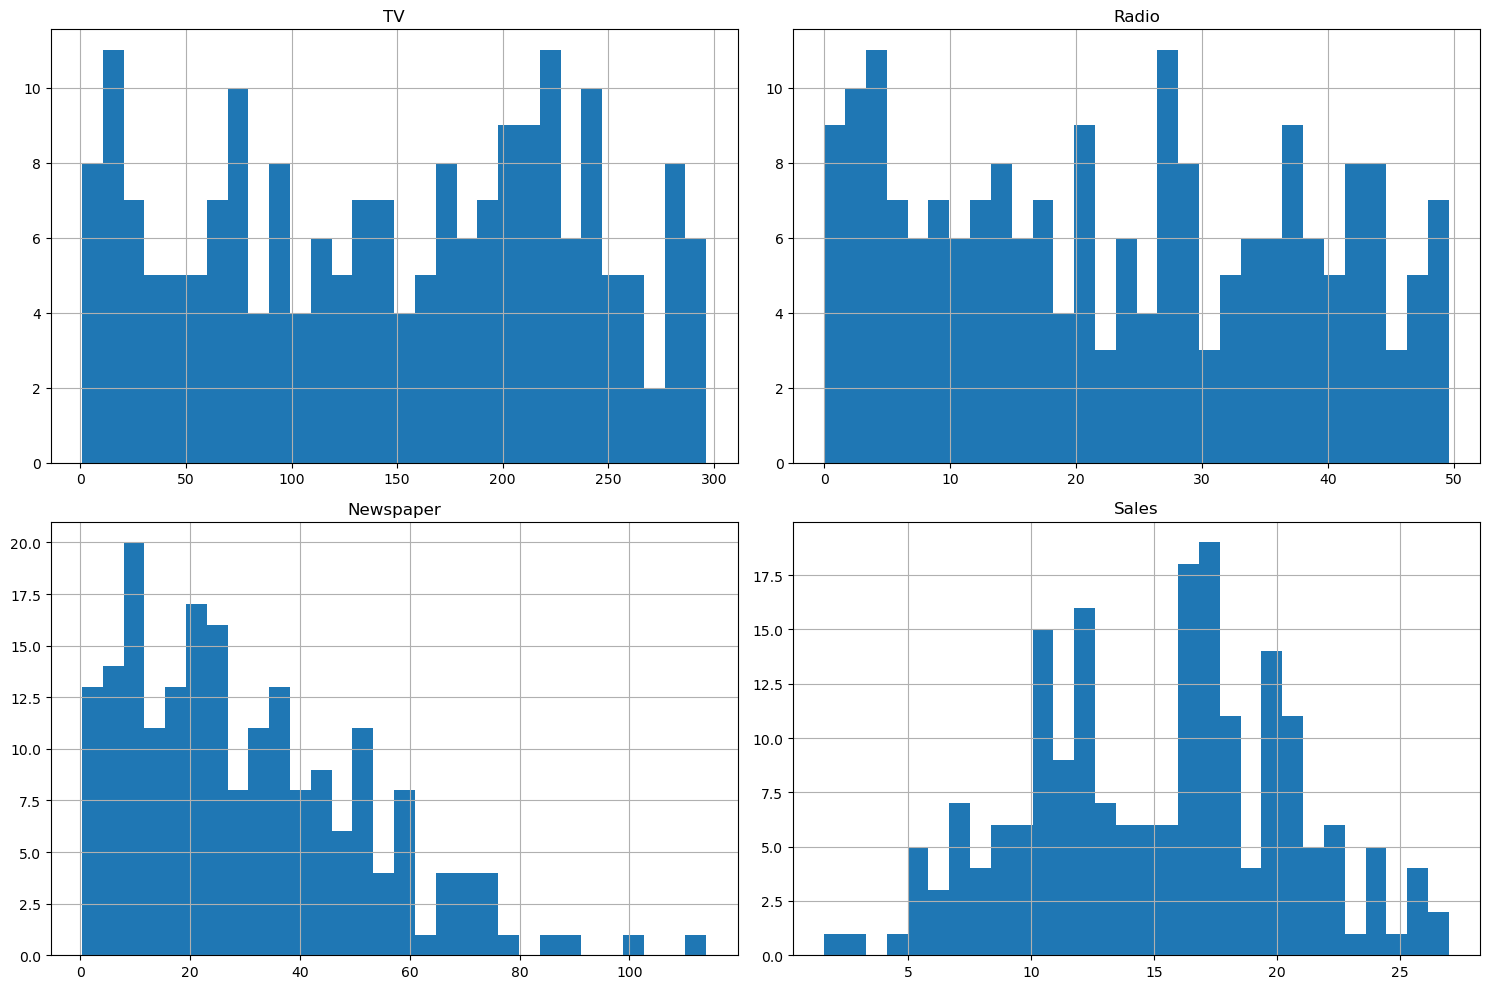

In [6]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df[['TV', 'Radio', 'Newspaper', 'Sales']].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

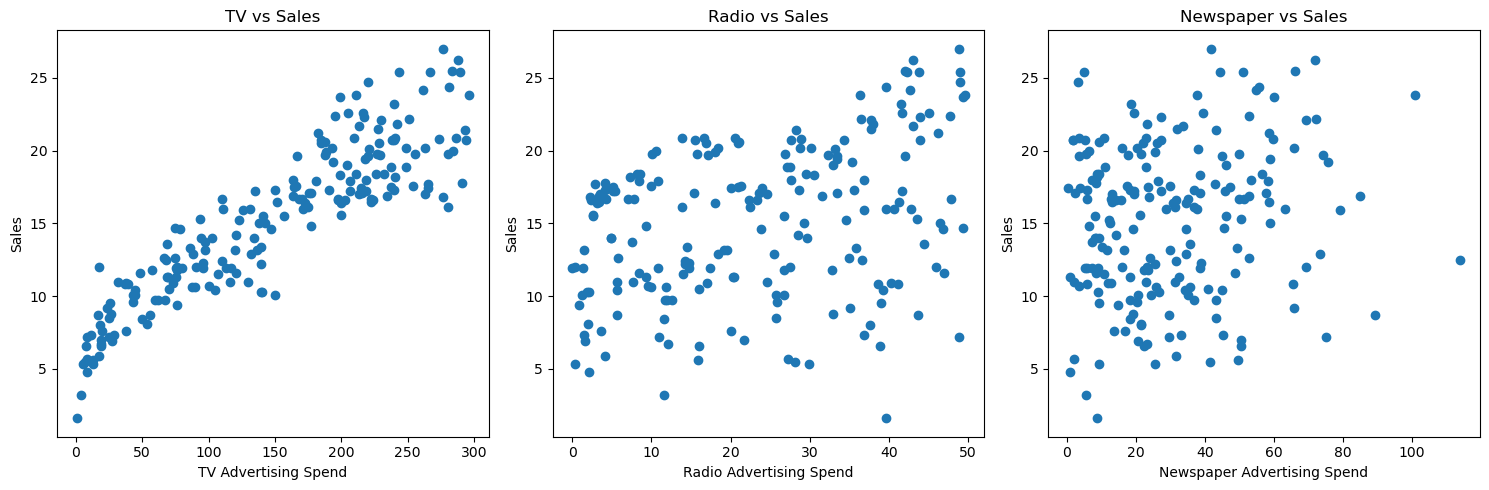

In [7]:
# Scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot for TV
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV vs Sales')

# Scatter plot for Radio
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

# Scatter plot for Newspaper
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

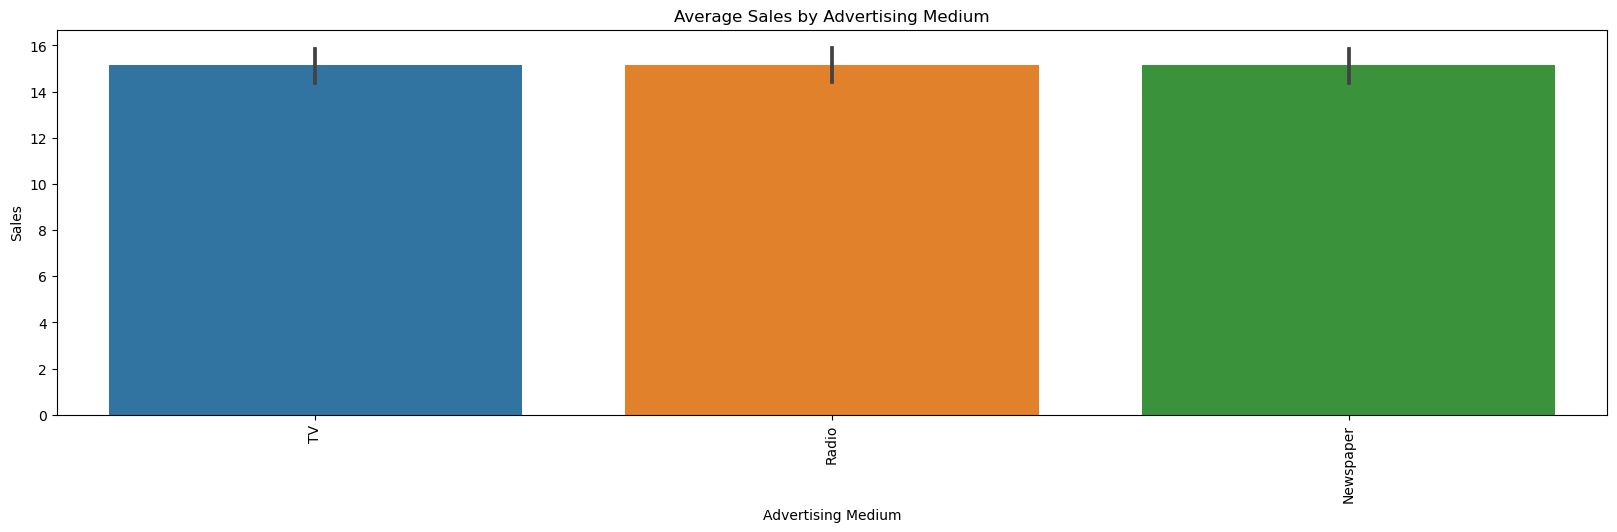

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Advertising.csv')

# Function to create bar plots for advertising spend
def plot_advertising_bar_plots(df, features, target, target_name):
    # Group by the features and calculate the mean target value for each group
    feature_means = df[features + [target]].groupby(features).mean().reset_index()
    melted_feature_means = feature_means.melt(id_vars=target, value_vars=features)
    melted_feature_means = melted_feature_means[melted_feature_means['value'] > 0]
    
    plt.figure(figsize=(20, 5))
    sns.barplot(data=melted_feature_means, x='variable', y=target)
    plt.xlabel('Advertising Medium')
    plt.ylabel(target_name)
    plt.title(f'Average {target_name} by Advertising Medium')
    plt.xticks(rotation=90)
    plt.show()

# Plotting average sales by advertising medium
plot_advertising_bar_plots(df, ['TV', 'Radio', 'Newspaper'], 'Sales', 'Sales')


### Split Data into train set and test set

In [15]:


# Determine the split ratio (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_index = int(split_ratio * len(df))

# Split into training and testing sets
train_df = adv_df.iloc[:split_index]
test_df = adv_df.iloc[split_index:]

# Optionally, reset index for both datasets
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Split into x (features) and y (target) for training and testing sets
x_train = train_df.iloc[:, :-1]  # All columns except the last one
y_train = train_df.iloc[:, -1]   # The last column
x_test = test_df.iloc[:, :-1]    # All columns except the last one
y_test = test_df.iloc[:, -1]     # The last column

# Display the shapes of the datasets to verify
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (160, 3)
Shape of y_train: (160,)
Shape of x_test: (40, 3)
Shape of y_test: (40,)


# <a name="toc_15456_2.1"></a>
## 2.1 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

In [16]:
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

<a name="toc_15456_2.2"></a>
###  Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

<a name="toc_15456_3"></a>
## Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`



<a name="toc_15456_4"></a>
### Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

<a name="toc_15456_5"></a>
### Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [36]:
import numpy as np
import pandas as pd

def multiplemodel(x_train, y_train, w, b):
    """
    Args:
        x_train (ndarray): Shape (m,n) Input to the model (advertising data)
        y_train (ndarray): Shape (m,) Label (sales)
        w (ndarray): Shape (n,) Parameters of the model (weights)
        b (float): Parameter of the model (bias)
    Returns:
        df (DataFrame): DataFrame containing x_train, y_train, and ypredict
        ypredict (ndarray): Predicted sales 
    """
    # Convert inputs to numpy arrays if they are lists
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    w = np.array(w)
    
    # Ensure b is a scalar
    if isinstance(b, (list, np.ndarray)):
        raise ValueError("Bias term 'b' should be a scalar, not a list or array.")
    
    # Debug prints
    print(f"x_train shape: {x_train.shape}")
    print(f"w shape: {w.shape}")
    print(f"b value: {b}")

    # number of training examples
    m, n = x_train.shape  # number of examples and features

    # Predicting the sales
    ypredict = np.dot(x_train, w) + b
    
    # Creating a DataFrame to store x_train, y_train, and ypredict
    df = pd.DataFrame(x_train, columns=[f'Feature_{i}' for i in range(n)])
    df['y_train'] = y_train
    df['ypredict'] = ypredict

    return df,ypredict



In [37]:
def cost_functionR(x, y, w, b, lambda_):
    """
    Computes the cost for linear regression with L2 regularization.
    Args:
        x (ndarray): Shape (m,n) Input data
        y (ndarray): Shape (m,) Labels
        w (ndarray): Shape (n,) Parameters of the model (weights)
        b (float): Parameter of the model (bias)
        lambda_ (float): Regularization parameter
    Returns:
        float: The cost
    """
    m = len(y)
    y_pred = np.dot(x, w) + b
    mse = (1/(2*m)) * np.sum((y_pred - y) ** 2)
    regularization = (lambda_ / (2*m)) * np.sum(w ** 2)
    cost = mse + regularization
    return cost


In [38]:
def gradient_descentR(x_train, y_train, w, b, learning_rate, iterations, lambda_):
    """
    Args:
        x_train (ndarray): Shape (m,n) Input to the model (advertising data)
        y_train (ndarray): Shape (m,) Label (sales)
        w (ndarray): Shape (n,) Parameters of the model (weights)
        b (float): Parameter of the model (bias)
        learning_rate (float): Learning rate
        iterations (int): Number of iterations for gradient descent
        lambda_ (float): Regularization parameter
    Returns:
        list: History of weights
        list: History of bias
        list: History of cost
    """
    # Convert inputs to numpy arrays if they are lists
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    w = np.array(w)
    
    # Ensure b is a scalar
    if isinstance(b, (list, np.ndarray)):
        raise ValueError("Bias term 'b' should be a scalar, not a list or array.")
    
    # Debug prints
    print(f"x_train shape: {x_train.shape}")
    print(f"w shape: {w.shape}")
    print(f"b value: {b}")

    # Number of training examples
    m, n = x_train.shape  # number of examples and features
    
    dJ_dw = np.zeros(n)
    dj_db = 0
    whist = []
    bhist = []
    cost_hist = []
    
    for h in range(iterations):
        sumb = 0
        for i in range(n):
            sumw = 0
            for j in range(m):
                yhat = np.dot(x_train[j], w) + b
                sumw += (yhat - y_train[j]) * x_train[j][i]
            dJ_dw[i] = (sumw / m) + (lambda_ / m) * w[i]
            w[i] = w[i] - learning_rate * dJ_dw[i]
        
        for k in range(m):
            yhat = np.dot(x_train[k], w) + b
            sumb += (yhat - y_train[k])
        dj_db = sumb / m
        b = b - learning_rate * dj_db
        
        whist.append(w.copy())  # Use copy to avoid reference issues
        bhist.append(b)
        
        # Calculate and print cost
        cost = cost_functionR(x_train, y_train, w, b, lambda_)
        cost_hist.append(cost)
        if h % math.ceil(iterations / 10) == 0:
            print(f"Iteration {h+1}/{iterations}, Cost: {cost}, w: {w}, b: {b}")
        
    return whist, bhist, cost_hist


x_train shape: (160, 3)
w shape: (3,)
b value: 0
Iteration 1/100000, Cost: 283.88613434724135, w: [24.86735774  7.11781953  3.3737995 ], b: -5.8786192431379645
Iteration 10001/100000, Cost: 1.3681763303040997, w: [4.09405759 7.83322803 0.2308205 ], b: 15.289019142953356
Iteration 20001/100000, Cost: 1.3681763303040997, w: [4.09405759 7.83322803 0.2308205 ], b: 15.289019142953357
Iteration 30001/100000, Cost: 1.3681763303040997, w: [4.09405759 7.83322803 0.2308205 ], b: 15.289019142953357
Iteration 40001/100000, Cost: 1.3681763303040997, w: [4.09405759 7.83322803 0.2308205 ], b: 15.289019142953356
Iteration 50001/100000, Cost: 1.3681763303040997, w: [4.09405759 7.83322803 0.2308205 ], b: 15.289019142953357
Iteration 60001/100000, Cost: 1.3681763303040997, w: [4.09405759 7.83322803 0.2308205 ], b: 15.289019142953357
Iteration 70001/100000, Cost: 1.3681763303040997, w: [4.09405759 7.83322803 0.2308205 ], b: 15.289019142953356
Iteration 80001/100000, Cost: 1.3681763303040997, w: [4.0940575

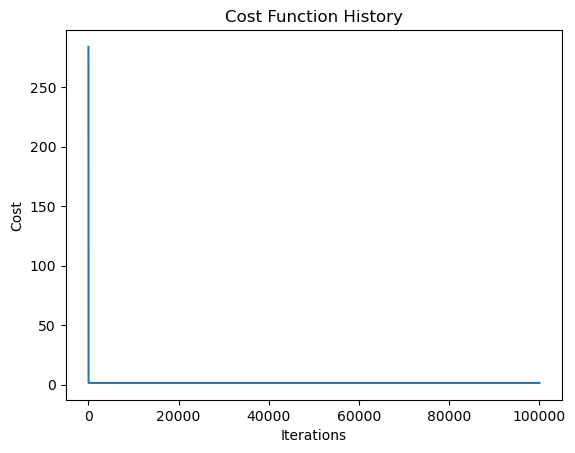

In [41]:
alpha =1.2
iterations =100000

#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
 # Normalize our features
x_train_scaled= (x_train - x_train.mean()) / x_train .std()
# Initialize weights and bias
w2  =np.zeros(3)
b2 =0
lamda=0.004
# Run gradient descent to get weight and bias history
w_hist, b_hist, cost_hist = gradient_descentR(x_train_scaled, y_train, w2, b2, alpha, iterations, lamda)

# Plotting the history of cost if needed
plt.plot(cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [42]:
# Normalize our features
w=[4.09405759, 7.83322803 ,0.2308205 ]
b= 15.289019142953357
x_test_scaled = (x_test - x_test.mean()) / x_test .std()
dftest,yp =multiplemodel(x_test_scaled, y_test, w, b)
dftest

x_train shape: (40, 3)
w shape: (3,)
b value: 15.289019142953357


,Feature_0,Feature_1,Feature_2,y_train,ypredict
0,1.234302,-0.603212,-0.453260,16.4,15.512604
1,0.201295,-0.392564,-0.231901,13.3,12.984561
2,1.423528,-0.603212,-0.513955,19.9,16.273296
3,1.127193,-0.380663,-0.730553,18.0,16.753364
4,0.576177,-0.643676,-0.754355,11.9,12.431743
5,1.972164,-0.778157,0.190585,16.9,17.311685
6,-0.605592,-0.371143,-0.561559,8.0,9.772825
7,1.642507,-0.756735,-0.587741,17.2,15.950195
8,1.744855,-0.537757,-0.133123,17.1,18.189459
9,2.564834,-0.692470,-0.742454,20.0,20.193952


### Evaluation Metrics

In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
mse = mean_squared_error(y_test, yp)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, yp)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R2)
r2 = r2_score(y_test, yp)
print("R-squared (R2):", r2)
print("RMSE",np.sqrt(mean_squared_error(y_test,yp)))

Mean Squared Error (MSE): 3.17357835773311
Mean Absolute Error (MAE): 1.3913693045931068
R-squared (R2): 0.8826234913107566
RMSE 1.781454001015213


In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_accuracy(y_true, y_pred):
    """
    Calculate accuracy based on various regression metrics.

    Parameters:
    - y_true: np.ndarray
        Array containing the true target values.
    - y_pred: np.ndarray
        Array containing the predicted target values.

    Returns:
    - float
        Accuracy measure, scaled or normalized as needed.
    """
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    # Optionally, you can scale MAE to a percentage accuracy measure
    accuracy = 1 - mae / np.mean(y_true)  # Example scaling

    return accuracy
accuracy=calculate_accuracy(y_test, yp)
print("Accuracy:", accuracy)


Accuracy: 0.912008265322175


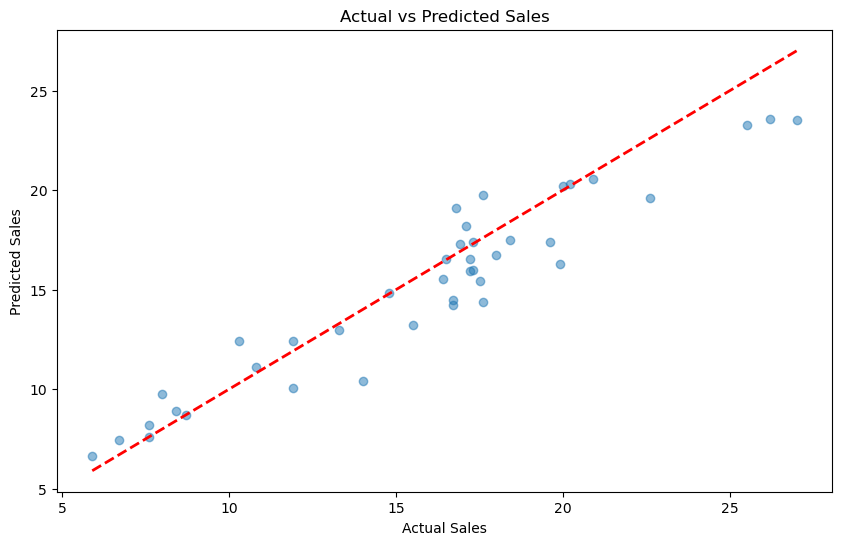

In [55]:
# Step 4: Plot Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


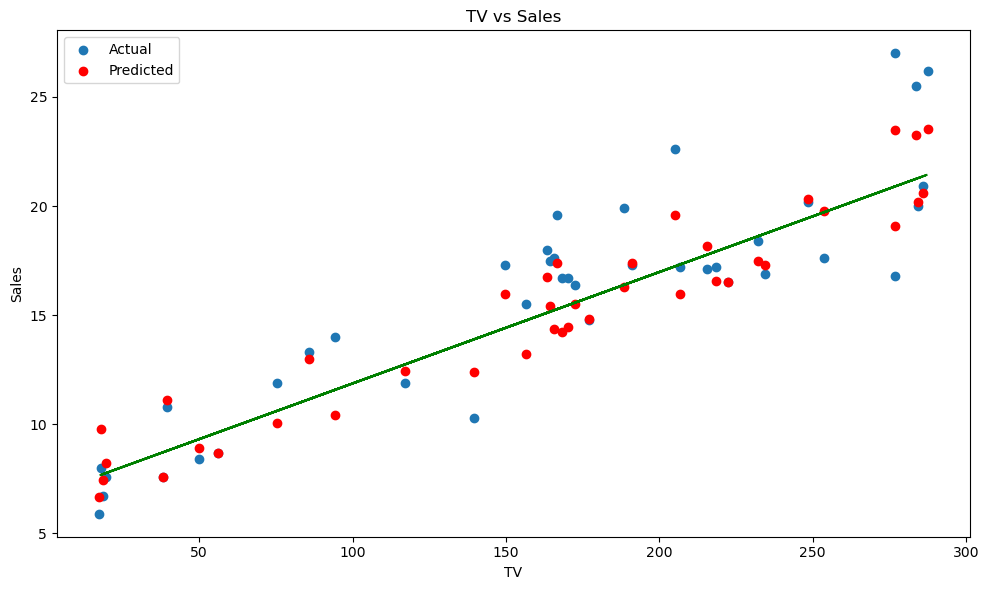

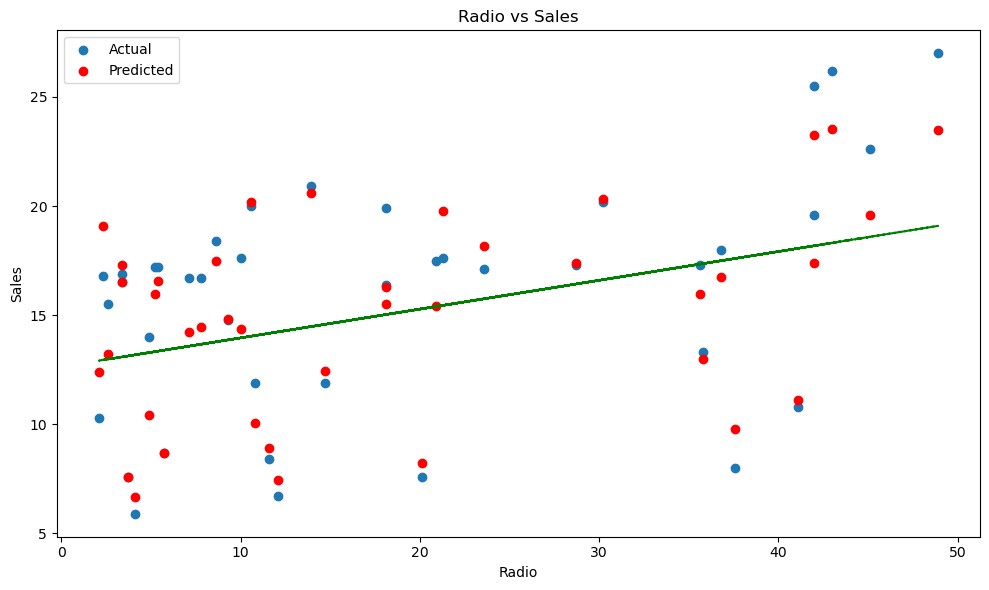

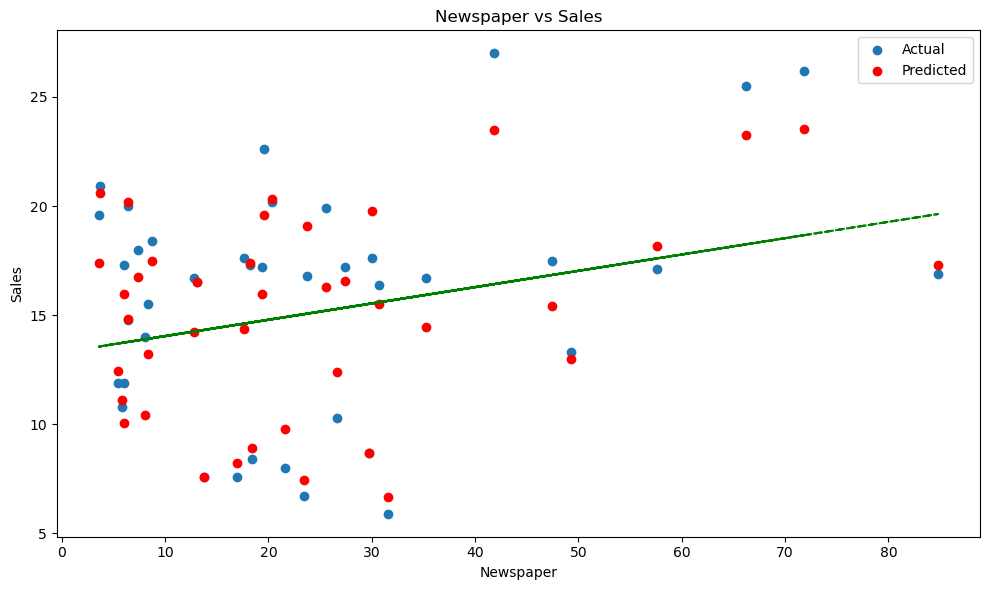

In [59]:
# Step 1: Define Numerical Features
numerical_features = ['TV', 'Radio', 'Newspaper']  # Assuming these are the numerical features

# Step 2: Create Separate Figures for Each Feature
for feature in numerical_features:
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Plotting the feature against the target (Sales)
    plt.scatter(x_test[:, numerical_features.index(feature)], y_test, alpha=1, label='Actual')
    plt.scatter(x_test[:, numerical_features.index(feature)], yp, alpha=1, label='Predicted', color='r')
    
    # Fit a line for better visualization
    z = np.polyfit(x_test[:, numerical_features.index(feature)], yp, 1)
    p = np.poly1d(z)
    plt.plot(x_test[:, numerical_features.index(feature)], p(x_test[:, numerical_features.index(feature)]), "g--")
    
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(f'{feature} vs Sales')
    plt.legend()
    
    plt.tight_layout()
    plt.show()